# Mount Google Drive
*   https://www.kaggle.com/code/manishthem/entity-recognition-for-ocr-using-text-data-xml/notebook
*   http://alexminnaar.com/2019/08/22/ner-rnns-tensorflow.html
*   https://github.com/yrnigam/Named-Entity-Recognition-NER-using-LSTMs/blob/master/Named_Entity_Recognition_(NER)_using_LSTMs.ipynb
*   https://sandipanweb.wordpress.com/2020/08/30/named-entity-recognition-ner-on-twitter-with-bi-directional-lstm-with-tensorflow-in-python/
* https://www.kaggle.com/code/itsmerasheed/named-entity-recognition-ner-with-tensorflow/notebook
* https://www.kaggle.com/code/akanksha496/sentiment-analysis/data
* https://www.embedded-robotics.com/sentiment-analysis-using-lstm/
*https://www.dataknowsall.com/ner.html












In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data File OCR dan TIF yang Ada Di Dalam Direktori Google Drive kemudian masukkan dalam list

In [5]:
import os
DIREKTORI = '/content/drive/MyDrive/proB-ml/OCR/ImageAndXML_Data'
data_files = os.listdir(DIREKTORI)
# print(data_files)

Ambil file OCR dan file TIF. Masukkan dalam list

In [6]:
import fnmatch
file_ocr = []
file_tif = []
i = 0
for file in data_files:
    if fnmatch.fnmatch(file,'*_ocr.xml'):
        i +=1
        file_ocr.append(file)    
        tif = file.replace("_ocr.xml",".tif")
        file_tif.append(tif)

print("jumlah file OCR",i)

jumlah file OCR 520


Coba lihat pola yang ada dari file OCR 

In [7]:
# lihat data
idx = 0
file_ocr1 = open(DIREKTORI+"/"+file_ocr[idx])
print(file_ocr1.name)
print(file_tif[idx])
# print(file_ocr1.read())


/content/drive/MyDrive/proB-ml/OCR/ImageAndXML_Data/0060076201_ocr.xml
0060076201.tif


Coba lihat gambar dari salah satu file Invoice

In [8]:
# lihat gambar tif
from PIL import Image 
# im = Image.open(DIREKTORI+"/"+file_tif[idx])
# im

# Lakukan Iterasi di Dalam file XML. Kemudian ambil text yang penting

In [9]:
from lxml import etree, objectify

parser = etree.XMLParser(remove_blank_text=True)
tree = etree.parse(os.path.join(DIREKTORI,file_ocr[0]))
root = tree.getroot()

for elem in root.getiterator():
    if not hasattr(elem.tag, 'find'): continue  
    i = elem.tag.find('}')
    if i >= 0:
        elem.tag = elem.tag[i+1:]
objectify.deannotate(root, cleanup_namespaces=True)

In [10]:
tag_list = []
for element in root.iter():
    tag_list = element.tag
print(tag_list)

Coords


In [11]:
import re
prev_block_Page = ''
prev_block_Block = ''
prev_block_Line = ''
prev_block_Word = ''
sentence = ''
sentence2 = ''
sentence3 = ''
block = []
line = []
for element in root.iter('Unicode'):
    same_page = same_block = same_line = next_word = False
    parent_node = next(element.iterancestors('Word'))
    block_list = parent_node.attrib['id'].split('_')
    if(prev_block_Page == block_list[0] or prev_block_Page == ''):
        same_page = True
    if(prev_block_Block == block_list[1] or prev_block_Block == ''):
        same_block = True        
    if(prev_block_Line == block_list[2] or prev_block_Line == ''):
        same_line = True
    if(prev_block_Word == int(block_list[3][1:])-1 or prev_block_Word == ''):
        next_word = True
                    
    #only same line present in one sentnece:
    #Here we check if the sentence contains the keywords which we are looking for like 'Date'
    if same_line and same_block:
        sentence3 = sentence3 + re.sub("[^0-9a-zA-Z:,]+", ' ',element.text) + ' ' 
    else:
        line.append(sentence3)
        sentence3 = ''
        sentence3 = sentence3 + re.sub("[^0-9a-zA-Z:,]+", ' ',element.text)+ ' '
    
    #same block in one line:
    if same_block:
        sentence = sentence + re.sub("[^0-9a-zA-Z:,]+", ' ',element.text) + ' '
    else:
        block.append(sentence)
        sentence = ''
        sentence = sentence + re.sub("[^0-9a-zA-Z:,]+", ' ',element.text)+ ' '  
      
    #all text in same line:
    sentence2 = sentence2 + re.sub("[^0-9a-zA-Z:,]+", ' ',element.text) + ' '
        
    prev_block_Page = block_list[0]
    prev_block_Block = block_list[1]
    prev_block_Line = block_list[2]
    prev_block_Word = int(block_list[3][1:])
print(line)
print(block)    
print(sentence2)

['Clonim Mirl linj  ini  a inmunicalmn  ', '340 IVmbrnrlrk Kuaii ', 'Crwm iHi  0 nm riirui P6K3  ', 'Invoice ', 'Clarion ', '2M MI 3600 FAX 203 332 0116 ', 'April 27, 1992 ', 'Invoice  : 04 0231 Job  : DAM Q 4024 ', 'Mr  Kenneth P  Noone ', 'Senior Director, Media   Direct Marketing ', 'The American Tobacco Company ', 'Six Stamford Forum ', 'P0 BOX 10380 ', 'Stamford, CT 06904 2380 ', 'APPROVALS ', 'DATE: ', 'mrtiiALt ', 'srtvrctt hr e K s ', 'sal ', 'FINANCCr ', ' r6 s ', 'zLL ', ' 7 IA C  C ODRi ', 'Ta ', 'ACC OL ', '  r  ', 'DATS i ', ' OF  bMtj ', 'f KTHFXto ', 'V f VOOlf  : ', '  j ', 'VOUCHERH ', '  ', 'vCVCtiCfi UOS  If  ', 'PROCESS : ', 'A r c vt  ', 'ACCOUNT H ', 'VALIDATION RESEARCH STUDY FOR DATACAP  W3  SMOKER NAME ', 'ACQUISITION PROGRAM ', 'Charge to conduct an outbound telephone research study to ', 'valdiate the DntaCap  W3  Smoker Name Acquisition Program  ', 'A total of 500 calls were completed for the research study ', 'by The Telephone Centre, Inc  New Rochelle, New

In [12]:
filename = 'beautiful_data.txt'
write_txt_to_file = open(filename,'a')
write_txt_to_file.write(sentence2)
write_txt_to_file.close()

In [13]:
import csv
field = ['TEXT']
row = sentence
filename = 'beautiful_data.csv'
with open(filename,'a',newline='') as csvfile:
    csvwriter = csv.writer(csvfile)#creates an object for writing in csv files
    csvwriter.writerow(sentence)

In [14]:
txt_filename = 'beautiful_data_summary.txt'
for xml_file in file_ocr:
    parser = None
    root = None
    tree = None
    new_sentence = ''
    parser = etree.XMLParser(remove_blank_text=True)
    xml_file_path = os.path.join(DIREKTORI,xml_file)
    tree = etree.parse(xml_file_path)
    root = tree.getroot()
    #remove the namespaces
    for elem in root.getiterator():
        if not hasattr(elem.tag, 'find'): continue  
        i = elem.tag.find('}')
        if i >= 0:
            elem.tag = elem.tag[i+1:]
    objectify.deannotate(root, cleanup_namespaces=True)
    
    for element in root.iter('Unicode'):
        new_sentence = new_sentence + re.sub("[^0-9a-zA-Z:,]+", ' ',element.text) + ' '
    #print('new_sentence = '+new_sentence)    
    #writing the new_sentence in the file 
    wrtie_txt_to_file = None
    write_txt_to_file = open(txt_filename,'a')
    write_txt_to_file.write(new_sentence)
    write_txt_to_file.write('\n')
    write_txt_to_file.close()

In [15]:
import pandas as pd
pd.set_option('display.max_colwidth',3000)
df = pd.read_csv('./beautiful_data_summary.txt',delimiter='/n',header=None)
# df.head(7)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


## AMBIL 

In [16]:
import spacy
import spacy.cli
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [17]:
print("jumlah data",df.shape[0])

jumlah data 1038


In [18]:
def tentukan_index(xval,xlist):
  return xlist.index(xval)

import re
from string import punctuation
def preprocess_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(f"[{re.escape(punctuation)}]", "", text)  # Remove punctuation
    text = " ".join(text.split())  # Remove extra spaces, tabs, and new lines
    return text

In [19]:
import csv
data_list_lengkap = []
data_header = ['ocr','text','label']
data_list_lengkap.append(data_header)
label_list = []
index_label = ''
for i in range(0, df.shape[0]):
  text = df.iloc[i,:]
  doc = nlp(str(text))
  for ent in doc.ents:
      if ent.label_ not in label_list:
        label_list.append(ent.label_)
      index_label = tentukan_index(ent.label_,label_list)
      data_list = [i,preprocess_text(ent.text),index_label]
      data_list_lengkap.append(data_list)
print(data_list_lengkap)

[['ocr', 'text', 'label'], [0, '340', 0], [0, 'kuaii crwm ihi', 1], [0, 'p6k3 invoice clarion 2m mi 3600', 2], [0, 'april 27 1992', 3], [0, '04 0231', 0], [0, 'dam q 4024 mr kenneth p', 4], [0, 'noone', 2], [0, 'media direct marketing the american tobacco company six', 2], [0, 'p0', 0], [0, 'stamford', 5], [0, 'ct', 2], [0, '2380 approvals date', 3], [0, 'k s', 2], [0, 'sal financcr r6 s zll', 6], [0, '7', 0], [0, 'ta acc ol r', 2], [0, 'bmtj', 2], [0, 'uos', 2], [0, 'account h validation research study', 2], [0, 'dntacap', 2], [0, 'smoker name acquisition program', 2], [0, '500', 0], [0, 'the telephone centre inc new rochelle', 2], [0, 'new york', 5], [0, '1971', 0], [0, '17', 0], [0, '500', 0], [0, '53', 0], [0, 'programming', 2], [0, 'messenger', 2], [0, 's1', 0], [0, 'k 34', 2], [0, '1992', 3], [0, 'carlton assault w 3 expansion program please remit', 7], [0, 'clarion marketing communications', 8], [0, '0', 0], [1, '3chur', 0], [1, 'philip morris u s', 2], [1, '26603', 3], [1, 'ric

In [20]:
label_list

['CARDINAL',
 'PRODUCT',
 'ORG',
 'DATE',
 'LAW',
 'GPE',
 'PERSON',
 'FAC',
 'WORK_OF_ART',
 'MONEY',
 'EVENT',
 'ORDINAL',
 'NORP',
 'QUANTITY',
 'LOC',
 'TIME',
 'LANGUAGE']

In [21]:
FILE_CSV = 'beautiful_data_train.csv'
with open(FILE_CSV, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data_list_lengkap)

In [22]:
import pandas as pd
df=pd.read_csv('./beautiful_data_train.csv')
df.tail()

,ocr,text,label
26410,1037,1,0
26411,1037,147,0
26412,1037,gray robertson cr,6
26413,1037,202937027j,3
26414,1037,1037,3


In [23]:
df = df.sample(frac=1, axis=1).reset_index(drop=True)

In [24]:
df.groupby('label').count()

,text,ocr
label,,
0,11076,11076
1,300,300
2,5334,5334
3,4148,4148
4,120,120
5,2092,2092
6,1920,1920
7,328,328
8,130,130


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


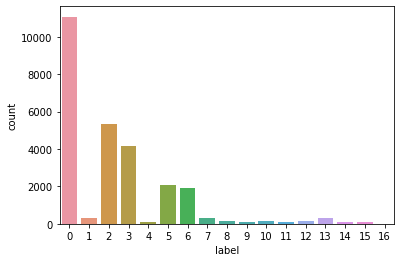

In [25]:
import seaborn as sns
sns.countplot(df['label'])

In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [27]:
df['text'] = df['text'].astype(str).to_numpy()
df['label'] = df['label'].to_numpy()

In [28]:
x_train,x_test,y_train,y_test= train_test_split(df['text'],df['label'],test_size=0.2)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(21132,) (21132,)
(5283,) (5283,)


In [29]:
vocab_size=100000
oov_tok='<OOV>'
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

In [30]:
tokenizer.fit_on_texts(x_train)
print("Number of Documents: ", tokenizer.document_count)
print("Number of Words: ", tokenizer.num_words)

Number of Documents:  21132
Number of Words:  100000


In [31]:
sequence_length = 200

In [32]:
train_sequences = tokenizer.texts_to_sequences(x_train)
train_padded = pad_sequences(train_sequences, maxlen=sequence_length, padding='post', truncating='post')

In [33]:
test_sequences = tokenizer.texts_to_sequences(x_test)
test_padded = pad_sequences(test_sequences, maxlen=sequence_length, padding='post', truncating='post')

In [64]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional

model = Sequential()
embedding_dim = 16
model.add(Embedding(vocab_size, embedding_dim, input_length=sequence_length))
lstm_out = 32
model.add(Bidirectional(LSTM(lstm_out)))
model.add(Dense(17, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 200, 16)           1600000   
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               12544     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 17)                1105      
                                                                 
Total params: 1,613,649
Trainable params: 1,613,649
Non-trainable params: 0
_________________________________________________________________
None


In [67]:
model.fit(train_padded, y_train, epochs=10, validation_data=(test_padded, y_test))

Epoch 1/10
661/661 [==============================] - 106s 160ms/step - loss: 0.1171 - accuracy: 0.9650 - val_loss: 0.3704 - val_accuracy: 0.8902
Epoch 2/10
661/661 [==============================] - 103s 155ms/step - loss: 0.1095 - accuracy: 0.9666 - val_loss: 0.3574 - val_accuracy: 0.8957
Epoch 3/10
661/661 [==============================] - 104s 158ms/step - loss: 0.1033 - accuracy: 0.9672 - val_loss: 0.3348 - val_accuracy: 0.9197
Epoch 4/10
661/661 [==============================] - 103s 156ms/step - loss: 0.0981 - accuracy: 0.9701 - val_loss: 0.3466 - val_accuracy: 0.8944
Epoch 5/10
661/661 [==============================] - 105s 159ms/step - loss: 0.0936 - accuracy: 0.9693 - val_loss: 0.3529 - val_accuracy: 0.8929
Epoch 6/10
661/661 [==============================] - 104s 157ms/step - loss: 0.0903 - accuracy: 0.9702 - val_loss: 0.3289 - val_accuracy: 0.9230
Epoch 7/10
661/661 [==============================] - 104s 157ms/step - loss: 0.0864 - accuracy: 0.9714 - val_loss: 0.3283 -

In [68]:
model.evaluate(test_padded, y_test)

166/166 [==============================] - 5s 30ms/step - loss: 0.3314 - accuracy: 0.9250


[0.33135536313056946, 0.9250425696372986]